<a href="https://www.kaggle.com/code/akshayr009/kidney-diseases-0-999-accuracy?scriptVersionId=100099564" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:
# Define path to the data directory
data_dir = Path('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
train_dir

PosixPath('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')


# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []


# Go through all the Cyst_cases . The label for these cases will be 1
for img in Cyst_cases:
    train_data.append((img, 0))
    # Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,1))

# Go through all the normal cases. The label for these cases will be 0
for img in Stone_cases:
    train_data.append((img,2))

# Go through all the Tumor_cases . The label for these cases will be 1
for img in Tumor_cases:
    train_data.append((img, 3))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../input/ct-kidney-dataset-normal-cyst-tumor-a...,3
1,../input/ct-kidney-dataset-normal-cyst-tumor-a...,3
2,../input/ct-kidney-dataset-normal-cyst-tumor-a...,2
3,../input/ct-kidney-dataset-normal-cyst-tumor-a...,0
4,../input/ct-kidney-dataset-normal-cyst-tumor-a...,3


In [4]:
train_data['label'].unique()

array([3, 2, 0, 1])

In [5]:
train_data.shape

(12446, 2)

1    5077
0    3709
3    2283
2    1377
Name: label, dtype: int64


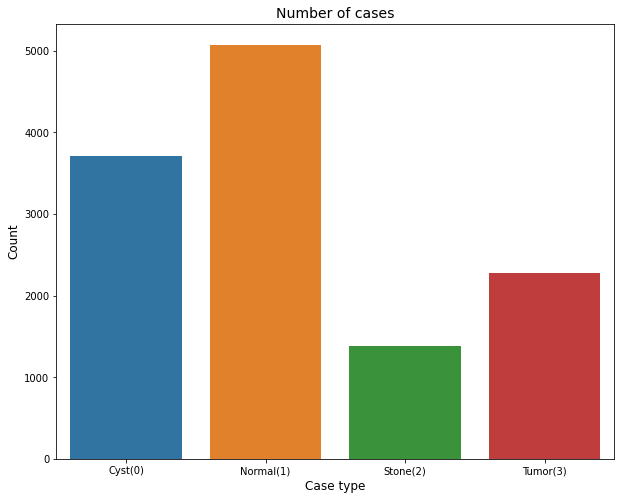

In [6]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

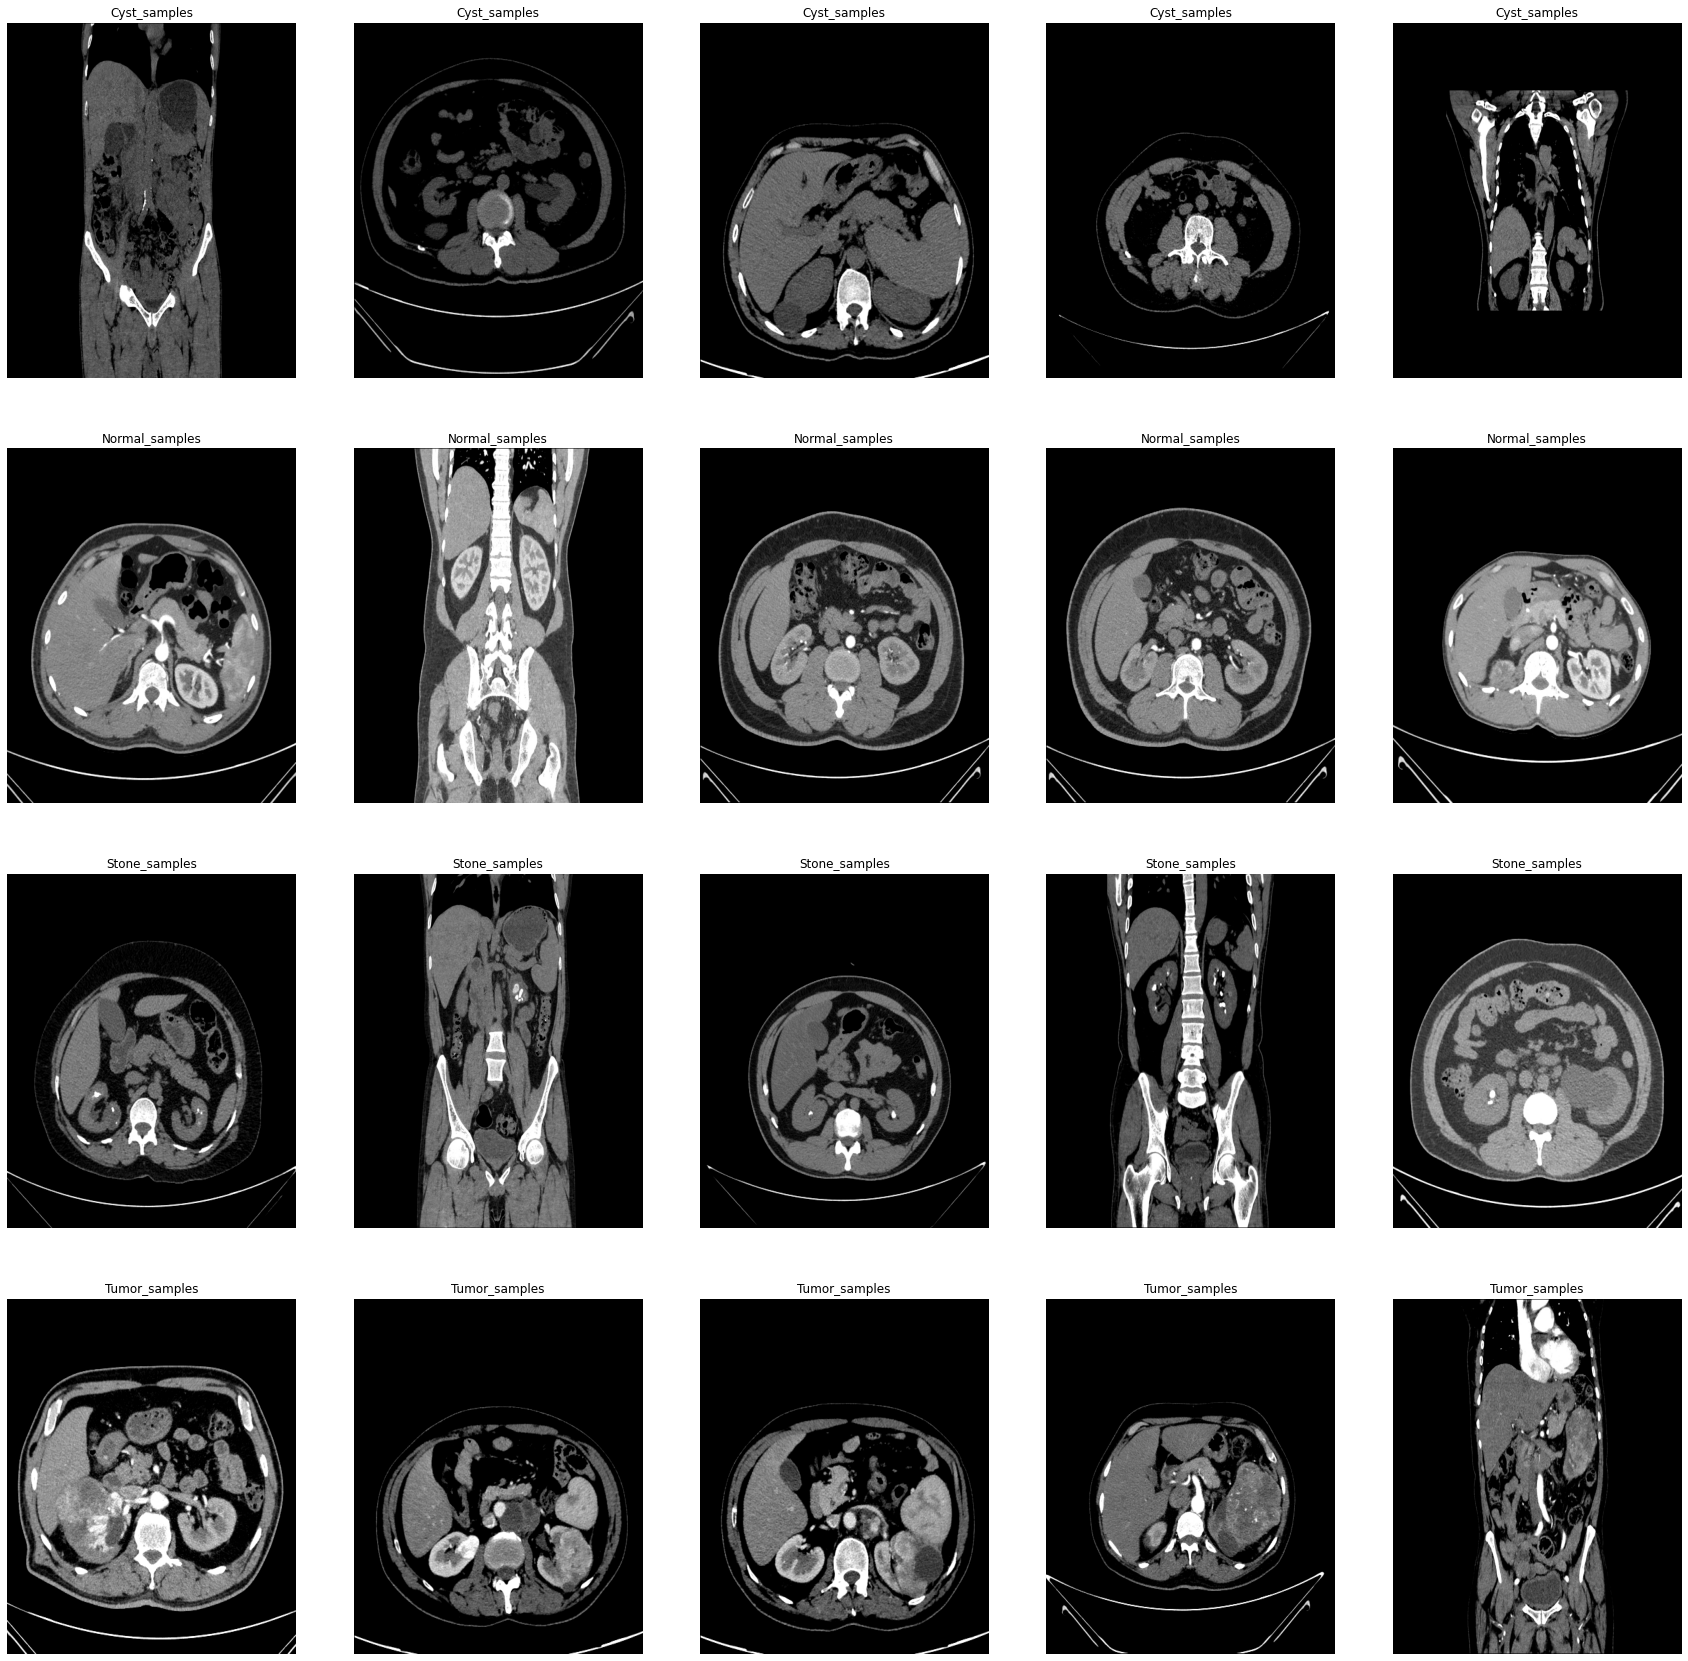

In [7]:
# Get few samples for both the classes
Cyst_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Normal_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
Tumor_samples = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Cyst_samples + Normal_samples+Stone_samples+Tumor_samples
del Cyst_samples, Normal_samples,Stone_samples,Tumor_samples

# Plot the data 
f, ax = plt.subplots(4,5, figsize=(30,30))
for i in range(20):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
        
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# loading train image using cv2

In [8]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')
train_data = []
train_labels = []
#from keras.utils.np_utils import to_categorical

for img in Cyst_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (12446, 28, 28, 3)
Total number of labels: (12446,)


In [9]:
train_data1.shape

(12446, 28, 28, 3)

In [10]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Train output file convert list to csv file 

In [11]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst


In [12]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [13]:
train_labels1['label']=train_labels1['label'].map({'Cyst':0,'Normal':1,
                                                   'Stone':2,'Tumor':3
                                                  })

In [14]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [15]:
print(train_data1.shape)
print(train_labels1.shape)


(12446, 28, 28, 3)
(12446, 1)


In [16]:
train_labels1.isnull().sum()

label    0
dtype: int64

# Solving image dataset imbalance using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64


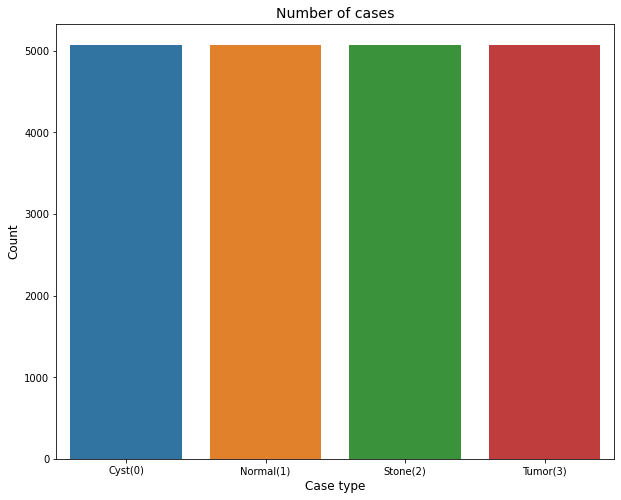

In [18]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [19]:
train_data2.shape

(20308, 2352)

In [20]:
train_labels2.shape

(20308, 1)

In [21]:
train_labels2['label'].value_counts()

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64

In [22]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.23, random_state=42)


In [24]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
#oversample =  RandomOverSampler(random_state=42)
#train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)

# **Augmentation
Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.

In [25]:
import tensorflow as tf
data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

2022-07-05 15:23:24.536808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [26]:


#from tensorflow import keras
#from tensorflow.keras import layers
#data_augmentation = keras.Sequential(
  #[
  #  layers.RandomFlip("horizontal",
  #                    input_shape=(28,
  #                                28,
   #                               3)),
 #   layers.RandomRotation(0.1),
#    layers.RandomZoom(0.1),
#  ]
#)

# Create the model

In [27]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    #data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

2022-07-05 15:23:28.999408: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-05 15:23:29.002565: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-05 15:23:29.062324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 15:23:29.063100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-07-05 15:23:29.063189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-07-05 15:23:29.120449: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,904
Trainable params: 53,904
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(4))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 640)               3

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

2022-07-05 15:23:32.229874: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-05 15:23:32.241778: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000194999 Hz


Epoch 1/100


2022-07-05 15:23:32.790792: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-07-05 15:23:33.659341: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-07-05 15:23:33.688484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


489/489 [==============================] - 10s 5ms/step - loss: 0.7227 - accuracy: 0.6860 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 2/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9869 - val_loss: 0.0311 - val_accuracy: 0.9925
Epoch 3/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.0153 - val_accuracy: 0.9974
Epoch 4/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0132 - val_accuracy: 0.9979
Epoch 5/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0162 - accuracy: 0.9958 - val_loss: 0.0188 - val_accuracy: 0.9944
Epoch 6/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.0147 - val_accuracy: 0.9974
Epoch 7/100
489/489 [==============================] - 2s 4ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0118 - val_accuracy: 0.9974
Epoch 8/10

# Testing the a image with sample data

In [30]:
pic=[]
img = cv2.imread(str('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1004).jpg'))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)
#pic_labels.append(pneu)


im

In [31]:
pic1 = np.array(pic)

In [32]:
a=model.predict(pic1)
a

array([[  3.715668, -12.910669, -10.15061 , -11.530984]], dtype=float32)

In [33]:
a.argmax()

0

In [34]:
#datagen = ImageDataGenerator()
#datagen.fit(train)
#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
#model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)

In [35]:
#!mkdir -p saved_model
model.save('kidney_model')

2022-07-05 15:27:05.737605: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [36]:
new_model = tf.keras.models.load_model('kidney_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 640)               3

In [37]:
a=new_model.predict(pic1)
a

array([[  3.715668, -12.910669, -10.15061 , -11.530984]], dtype=float32)

In [38]:
np.argmax(a)

0

In [39]:
image='../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1001).jpg'
img = cv2.imread(str(image))
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("kidney_tumor.jpg")